In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
License(s): other
  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 281MB/s]


In [ ]:
!unzip weather-dataset-rattle-package

Archive:  weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})
df = df[df['RainTomorrow'].notnull()]

/tmp/ipython-input-1691990750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
/tmp/ipython-input-1691990750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})


In [ ]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
df.shape

(142193, 23)

In [ ]:
X = df.drop(columns=['RainTomorrow']).copy()
y = df['RainTomorrow'].astype(int)

In [ ]:
if 'Date' in X.columns:
    X['Year'] = pd.to_datetime(X['Date']).dt.year
    X['Month'] = pd.to_datetime(X['Date']).dt.month
    X['Day'] = pd.to_datetime(X['Date']).dt.day
    X = X.drop(columns=['Date'])

In [ ]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month', 'Day']


In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

***ENCODING***

In [ ]:
X=pd.get_dummies(X,columns=categorical_cols,drop_first=True)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imputer = IterativeImputer(random_state=0)
X[numeric_cols] = iter_imputer.fit_transform(X[numeric_cols])

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,6.536366,7.366871,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,6.293977,11.175242,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,8.675884,12.066447,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,6.756636,11.866696,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,7.639210,6.005668,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
print(X.isnull().sum())

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 113, dtype: int64


In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,6.536366,7.366871,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,6.293977,11.175242,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,8.675884,12.066447,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,6.756636,11.866696,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,7.639210,6.005668,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled.shape

(142193, 113)

In [ ]:
y.shape

(142193,)

In [ ]:
# Align indices before splitting
X_scaled, y = X_scaled.align(y, join='inner', axis=0)

X_no  = X_scaled[y == 0].copy()
X_yes = X_scaled[y == 1].copy()

In [ ]:
n_yes = len(X_yes)
n_yes

31468

In [ ]:
n_no=len(X_no)
n_no

107535

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
def LOG_REG(X_train,X_test,y_train,y_test):
  log_reg = LogisticRegression(max_iter=500, random_state=0)
  log_reg.fit(X_train, y_train)

  y_pred_lr = log_reg.predict(X_test)
  y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

  print("Logistic Regression Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_lr))
  print(classification_report(y_test, y_pred_lr))
  roc_auc = roc_auc_score(y_test, y_proba_lr)
  fpr, tpr, _ = roc_curve(y_test, y_proba_lr)

  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - Logistic Regression")
  plt.legend()
  plt.show()
  return y_pred_lr, y_proba_lr

In [ ]:
def RAN_FOREST(X_train,X_test,y_train,y_test):
  rf = RandomForestClassifier(n_estimators=200, random_state=0)
  rf.fit(X_train, y_train)

  y_pred_rf = rf.predict(X_test)
  y_proba_rf = rf.predict_proba(X_test)[:, 1]

  print("Random Forest Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_rf))
  print(classification_report(y_test, y_pred_rf))

  roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
  fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color="green")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - Random Forest")
  plt.legend()
  plt.show()
  return y_pred_rf,y_proba_rf

In [ ]:
def DECI_TREE(X_train,X_test,y_train,y_test):
  dt = DecisionTreeClassifier(max_depth=20, random_state=0)
  dt.fit(X_train, y_train)

  y_pred_dt = dt.predict(X_test)
  y_proba_dt = dt.predict_proba(X_test)[:, 1]

  print("Decision Tree Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_dt))
  print(classification_report(y_test, y_pred_dt))

  roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
  fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_dt, tpr_dt, label=f"ROC Curve (AUC = {roc_auc_dt:.2f})", color="orange")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - Decision Tree")
  plt.legend()
  plt.show()
  return y_pred_dt,y_proba_dt

In [ ]:
def GRAD_BOOST(X_train,X_test,y_train,y_test):
  gb = GradientBoostingClassifier(random_state=0)
  gb.fit(X_train, y_train)

  y_pred_gb = gb.predict(X_test)
  y_proba_gb = gb.predict_proba(X_test)[:, 1]

  print("Gradient Boosting Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_gb))
  print(classification_report(y_test, y_pred_gb))

  roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
  fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_gb, tpr_gb, label=f"ROC Curve (AUC = {roc_auc_gb:.2f})", color="red")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - Gradient Boosting")
  plt.legend()
  plt.show()
  return y_pred_gb,y_proba_gb

In [ ]:
def XG_BOOST(X_train,X_test,y_train,y_test):
  xgb = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=5,random_state=0,use_label_encoder=False,eval_metric="logloss")
  xgb.fit(X_train, y_train)

  y_pred_xgb = xgb.predict(X_test)
  y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

  print("XGBoost Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
  print(classification_report(y_test, y_pred_xgb))

  roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
  fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {roc_auc_xgb:.2f})", color="purple")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - XGBoost")
  plt.legend()
  plt.show()
  return y_pred_xgb,y_proba_xgb

In [ ]:
def LIG_GBM(X_train,X_test,y_train,y_test):
  lgbm = LGBMClassifier(n_estimators=300,learning_rate=0.05,max_depth=-1,random_state=0)
  lgbm.fit(X_train, y_train)

  y_pred_lgbm = lgbm.predict(X_test)
  y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

  print("LightGBM Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
  print(classification_report(y_test, y_pred_lgbm))

  roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
  fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_proba_lgbm)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_lgbm, tpr_lgbm, label=f"ROC Curve (AUC = {roc_auc_lgbm:.2f})", color="darkblue")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - LightGBM")
  plt.legend()
  plt.show()
  return y_pred_lgbm,y_proba_lgbm

In [ ]:
def CAT_BOOST(X_train,X_test,y_train,y_test):
  catboost = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, random_state=0, verbose=0)
  catboost.fit(X_train, y_train)

  y_pred_catboost = catboost.predict(X_test)
  y_proba_catboost = catboost.predict_proba(X_test)[:, 1]

  print("CatBoost Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
  print(classification_report(y_test, y_pred_catboost))

  roc_auc_catboost = roc_auc_score(y_test, y_proba_catboost)
  fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_proba_catboost)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_catboost, tpr_catboost, label=f"ROC Curve (AUC = {roc_auc_catboost:.2f})", color="darkgreen")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - CatBoost")
  plt.legend()
  plt.show()
  return y_pred_catboost,y_proba_catboost

In [ ]:
def BAG_DECI_TREE(X_train,X_test,y_train,y_test):
  base_estimator=DecisionTreeClassifier(criterion="log_loss", max_depth=12,min_samples_split=10,min_samples_leaf=5)

  bagging_dt = BaggingClassifier(base_estimator,n_estimators=100,max_samples=0.8,max_features=0.8, bootstrap=True, random_state=0)

  bagging_dt.fit(X_train, y_train)

  y_pred_bagging = bagging_dt.predict(X_test)
  y_proba_bagging = bagging_dt.predict_proba(X_test)[:, 1]

  print("Bagging Decision Tree Results")
  print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
  print(classification_report(y_test, y_pred_bagging))

  roc_auc_bagging = roc_auc_score(y_test, y_proba_bagging)
  fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_proba_bagging)

  plt.figure(figsize=(6,6))
  plt.plot(fpr_bagging, tpr_bagging, label=f"ROC Curve (AUC = {roc_auc_bagging:.2f})", color="orange")
  plt.plot([0,1], [0,1], "k--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve - Bagging with Decision Tree")
  plt.legend()
  plt.show()
  return y_pred_bagging,y_proba_bagging

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def Results(
    y_test,
    y_pred_lr, y_proba_lr,
    y_pred_dt, y_proba_dt,
    y_pred_rf, y_proba_rf,
    y_pred_gb, y_proba_gb,
    y_pred_xgb, y_proba_xgb,
    y_pred_lgbm, y_proba_lgbm,
    y_pred_catboost, y_proba_catboost,
    y_pred_bagging, y_proba_bagging
):
    results = []

    def add_result(name, y_pred, y_proba):
        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
            "F1-Score": f1_score(y_test, y_pred)
        })

    add_result("Logistic Regression", y_pred_lr, y_proba_lr)
    add_result("Decision Tree", y_pred_dt, y_proba_dt)
    add_result("Random Forest", y_pred_rf, y_proba_rf)
    add_result("Gradient Boosting", y_pred_gb, y_proba_gb)
    add_result("XGBoost", y_pred_xgb, y_proba_xgb)
    add_result("LightGBM", y_pred_lgbm, y_proba_lgbm)
    add_result("Bagging Decision Tree", y_pred_bagging, y_proba_bagging)
    add_result("CatBoost", y_pred_catboost, y_proba_catboost)

    results_df = pd.DataFrame(results)

    results_df = results_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)
    print(results_df)
    return results_df

Results for k = 2
Yes count: 31468
No count : 31467
Logistic Regression Results
Accuracy: 0.5631206800667355
              precision    recall  f1-score   support

           0       0.57      0.50      0.53      6293
           1       0.56      0.63      0.59      6294

    accuracy                           0.56     12587
   macro avg       0.56      0.56      0.56     12587
weighted avg       0.56      0.56      0.56     12587



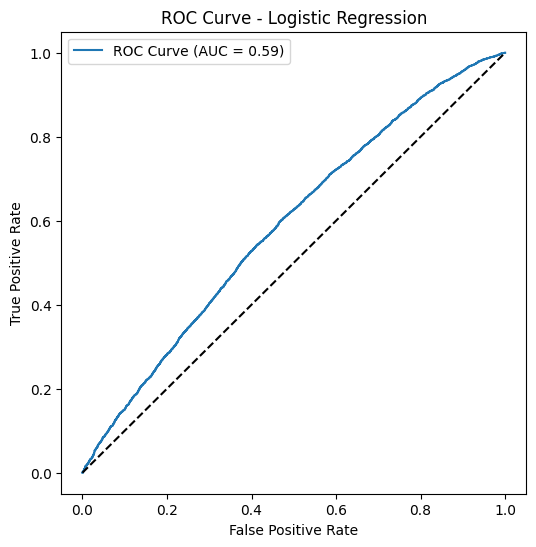

Random Forest Results
Accuracy: 0.5750377373480575
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      6293
           1       0.57      0.58      0.58      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



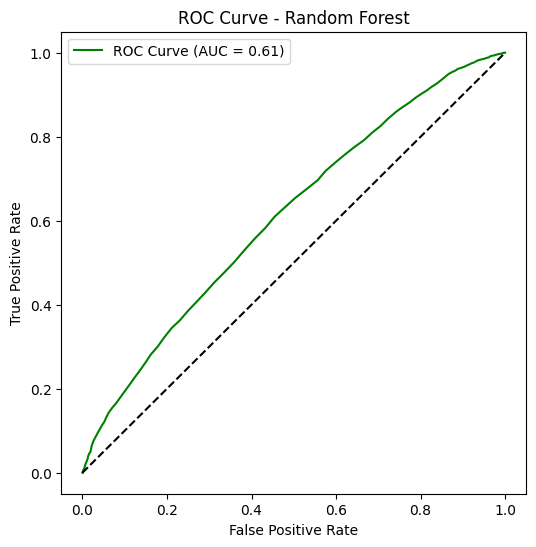

Decision Tree Results
Accuracy: 0.546039564630174
              precision    recall  f1-score   support

           0       0.56      0.40      0.47      6293
           1       0.54      0.69      0.60      6294

    accuracy                           0.55     12587
   macro avg       0.55      0.55      0.54     12587
weighted avg       0.55      0.55      0.54     12587



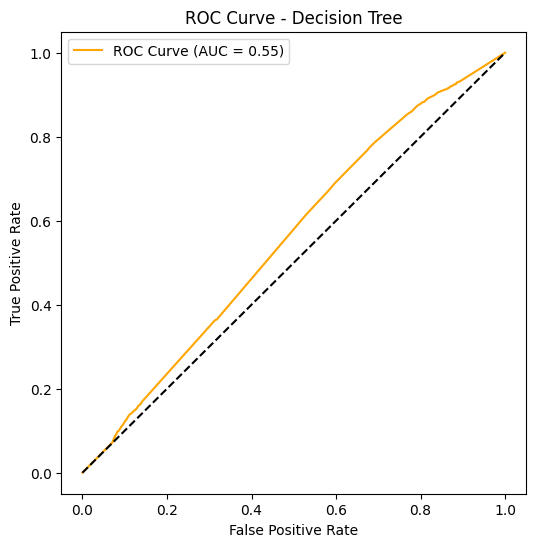

Gradient Boosting Results
Accuracy: 0.5717804083578295
              precision    recall  f1-score   support

           0       0.59      0.47      0.52      6293
           1       0.56      0.68      0.61      6294

    accuracy                           0.57     12587
   macro avg       0.58      0.57      0.57     12587
weighted avg       0.58      0.57      0.57     12587



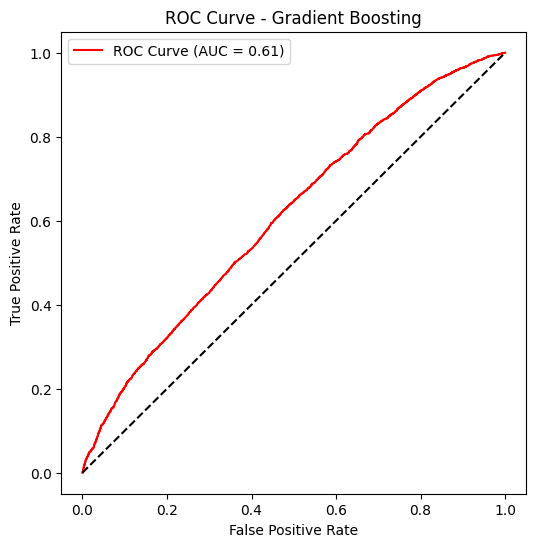

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:12:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5765472312703583
              precision    recall  f1-score   support

           0       0.59      0.53      0.55      6293
           1       0.57      0.63      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



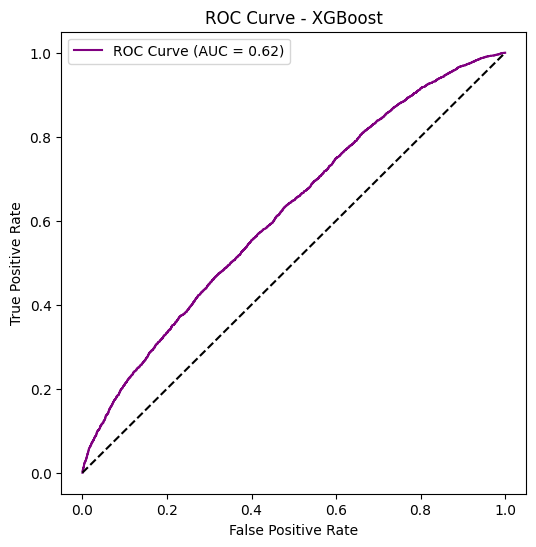

[LightGBM] [Info] Number of positive: 25174, number of negative: 25174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4491
[LightGBM] [Info] Number of data points in the train set: 50348, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5818701835226822
              precision    recall  f1-score   support

           0       0.59      0.53      0.56      6293
           1       0.57      0.64      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



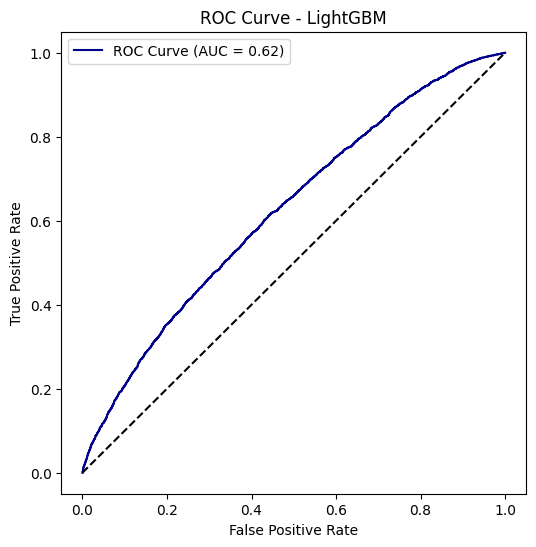

CatBoost Results
Accuracy: 0.5887026296973067
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      6293
           1       0.58      0.66      0.62      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



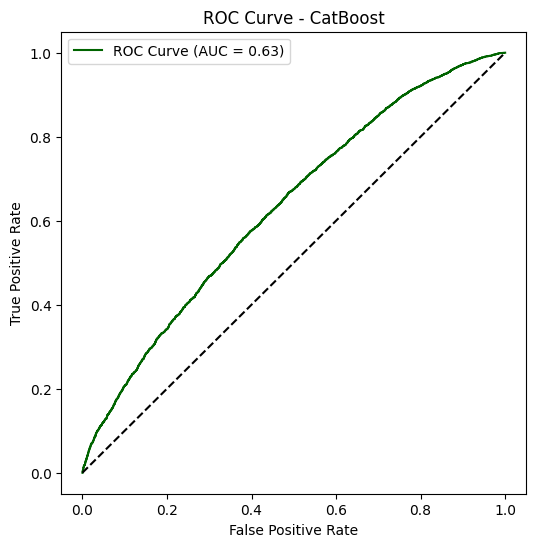

Bagging Decision Tree Results
Accuracy: 0.5744816080082625
              precision    recall  f1-score   support

           0       0.59      0.47      0.53      6293
           1       0.56      0.68      0.61      6294

    accuracy                           0.57     12587
   macro avg       0.58      0.57      0.57     12587
weighted avg       0.58      0.57      0.57     12587



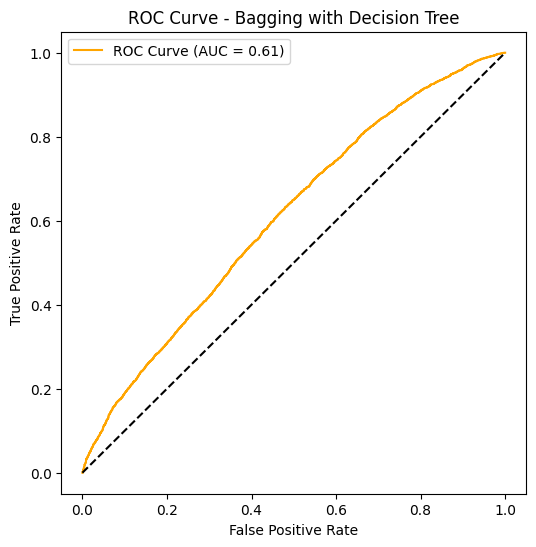

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.588703  0.629874  0.616376
1               LightGBM  0.581870  0.624217  0.603242
2                XGBoost  0.576547  0.618035  0.597067
3          Random Forest  0.575038  0.611375  0.578321
4      Gradient Boosting  0.571780  0.610688  0.612509
5  Bagging Decision Tree  0.574482  0.609011  0.614565
6    Logistic Regression  0.563121  0.587712  0.589963
7          Decision Tree  0.546040  0.554332  0.602587




In [ ]:
#for k=2
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)

Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 3
Yes count: 31468
No count : 31467
Logistic Regression Results
Accuracy: 0.563915150552157
              precision    recall  f1-score   support

           0       0.57      0.50      0.54      6293
           1       0.56      0.62      0.59      6294

    accuracy                           0.56     12587
   macro avg       0.56      0.56      0.56     12587
weighted avg       0.56      0.56      0.56     12587



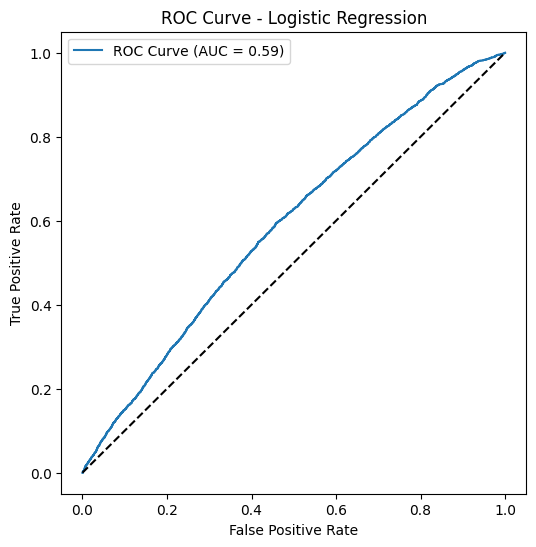

Random Forest Results
Accuracy: 0.5798840073091285
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      6293
           1       0.58      0.59      0.58      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



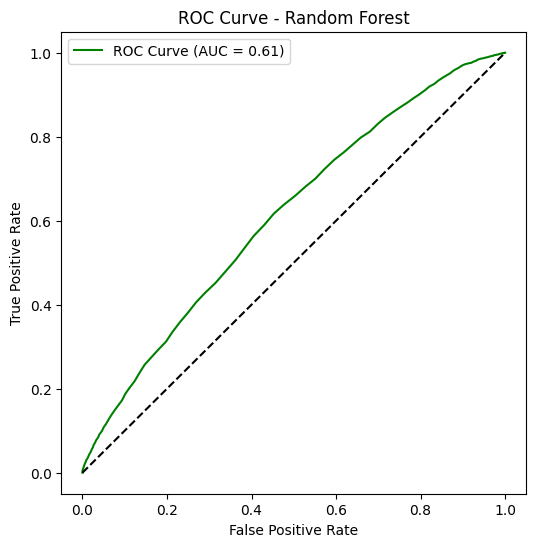

Decision Tree Results
Accuracy: 0.5453245411932947
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      6293
           1       0.53      0.72      0.61      6294

    accuracy                           0.55     12587
   macro avg       0.55      0.55      0.53     12587
weighted avg       0.55      0.55      0.53     12587



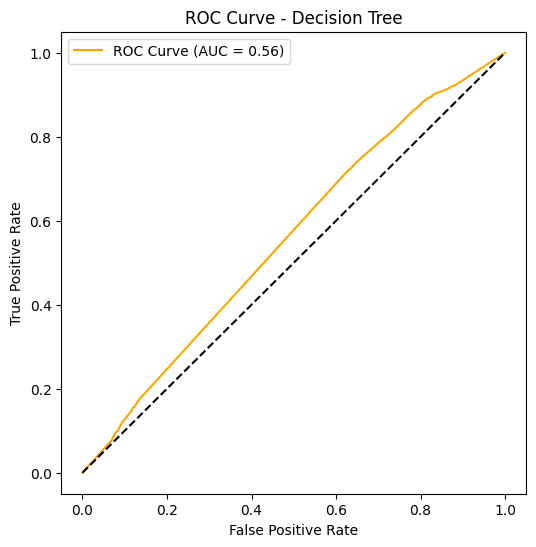

Gradient Boosting Results
Accuracy: 0.5717804083578295
              precision    recall  f1-score   support

           0       0.59      0.49      0.53      6293
           1       0.56      0.66      0.60      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.57     12587
weighted avg       0.57      0.57      0.57     12587



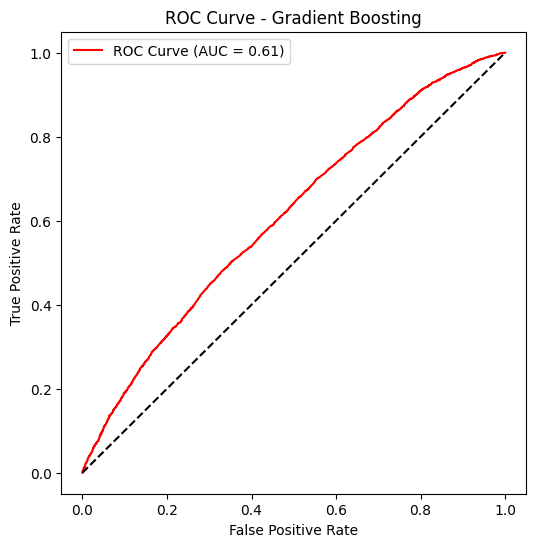

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:24:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.587193135775006
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      6293
           1       0.58      0.63      0.61      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



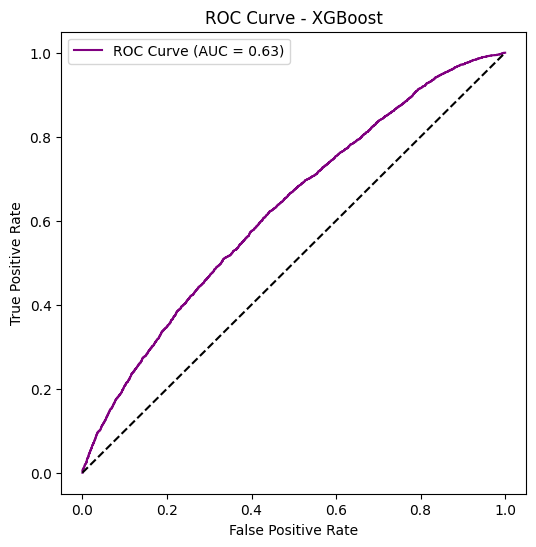

[LightGBM] [Info] Number of positive: 25174, number of negative: 25174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4488
[LightGBM] [Info] Number of data points in the train set: 50348, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5867164534837531
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      6293
           1       0.58      0.63      0.60      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



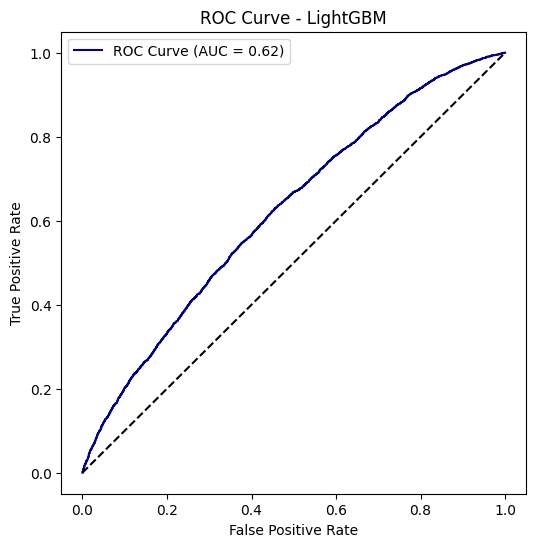

CatBoost Results
Accuracy: 0.5863986652895845
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      6293
           1       0.58      0.65      0.61      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.58     12587
weighted avg       0.59      0.59      0.58     12587



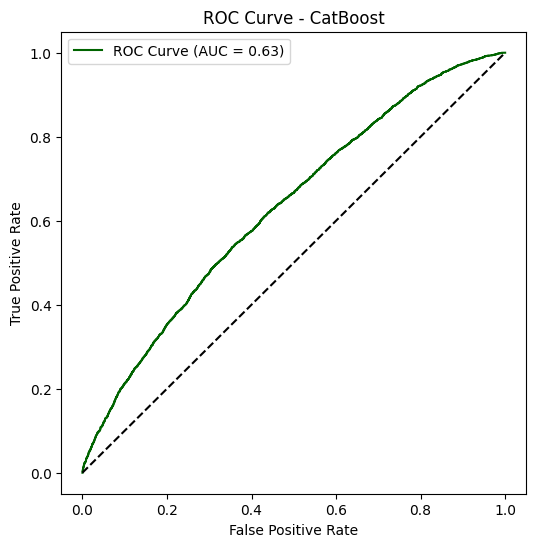

Bagging Decision Tree Results
Accuracy: 0.5678080559307221
              precision    recall  f1-score   support

           0       0.59      0.46      0.51      6293
           1       0.56      0.68      0.61      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.56     12587
weighted avg       0.57      0.57      0.56     12587



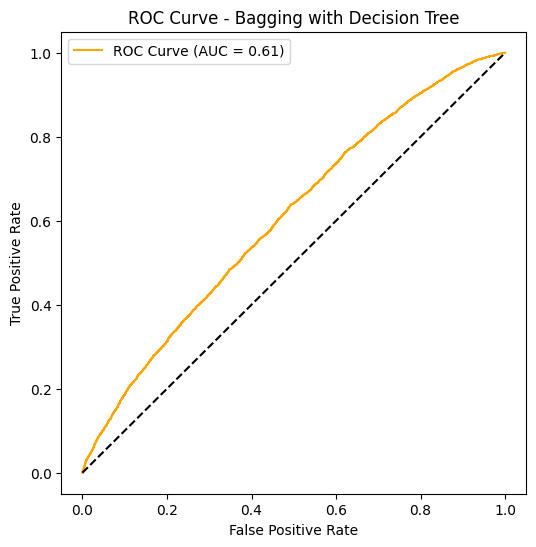

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.586399  0.630198  0.610621
1                XGBoost  0.587193  0.626517  0.605047
2               LightGBM  0.586716  0.622328  0.602658
3          Random Forest  0.579884  0.612766  0.583950
4      Gradient Boosting  0.571780  0.609716  0.604897
5  Bagging Decision Tree  0.567808  0.605430  0.611373
6    Logistic Regression  0.563915  0.587853  0.588376
7          Decision Tree  0.545325  0.556389  0.613807




In [ ]:
#for k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)


Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 4
Yes count: 31468
No count : 31466
Logistic Regression Results
Accuracy: 0.5587510923969174
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      6293
           1       0.55      0.62      0.59      6294

    accuracy                           0.56     12587
   macro avg       0.56      0.56      0.56     12587
weighted avg       0.56      0.56      0.56     12587



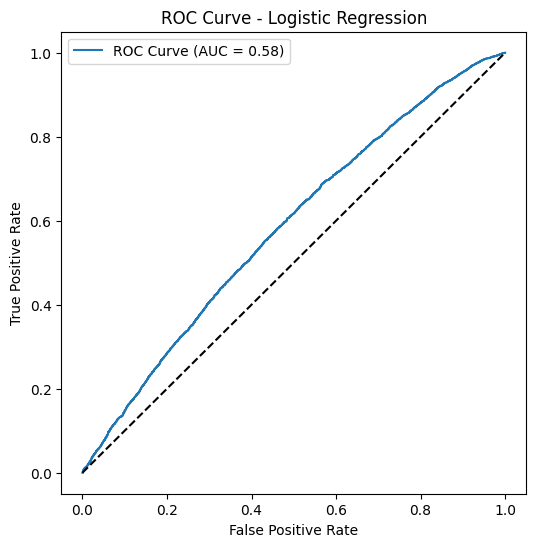

Random Forest Results
Accuracy: 0.5649479621832049
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      6293
           1       0.56      0.58      0.57      6294

    accuracy                           0.56     12587
   macro avg       0.56      0.56      0.56     12587
weighted avg       0.56      0.56      0.56     12587



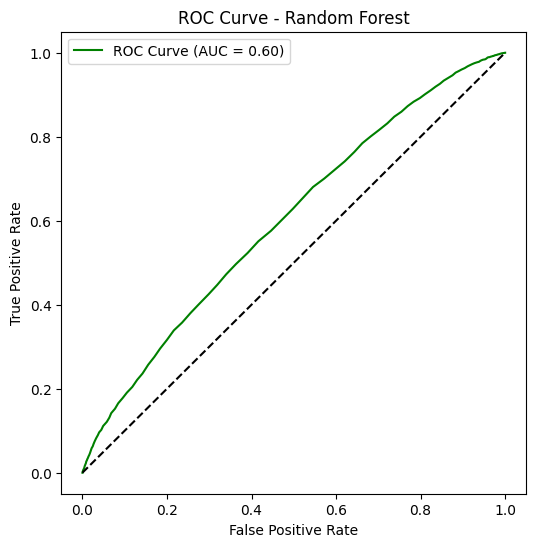

Decision Tree Results
Accuracy: 0.5380154127274172
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      6293
           1       0.54      0.57      0.55      6294

    accuracy                           0.54     12587
   macro avg       0.54      0.54      0.54     12587
weighted avg       0.54      0.54      0.54     12587



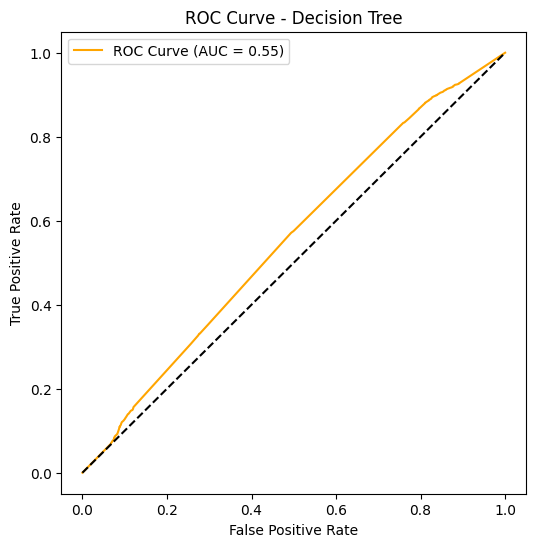

Gradient Boosting Results
Accuracy: 0.5651863033288314
              precision    recall  f1-score   support

           0       0.59      0.43      0.50      6293
           1       0.55      0.70      0.62      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.56     12587
weighted avg       0.57      0.57      0.56     12587



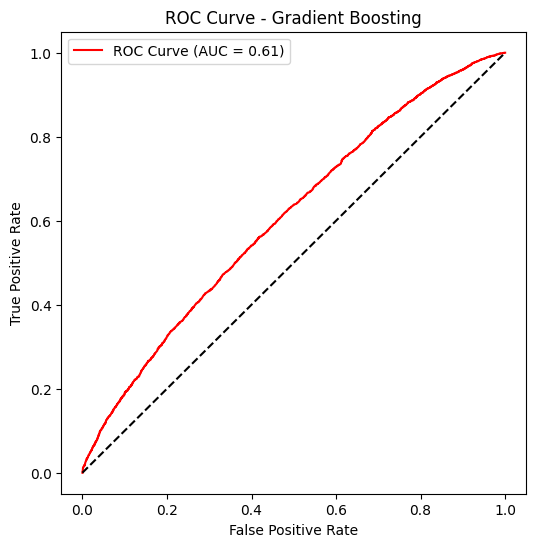

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:28:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5759911019305632
              precision    recall  f1-score   support

           0       0.59      0.51      0.54      6293
           1       0.57      0.65      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.57     12587
weighted avg       0.58      0.58      0.57     12587



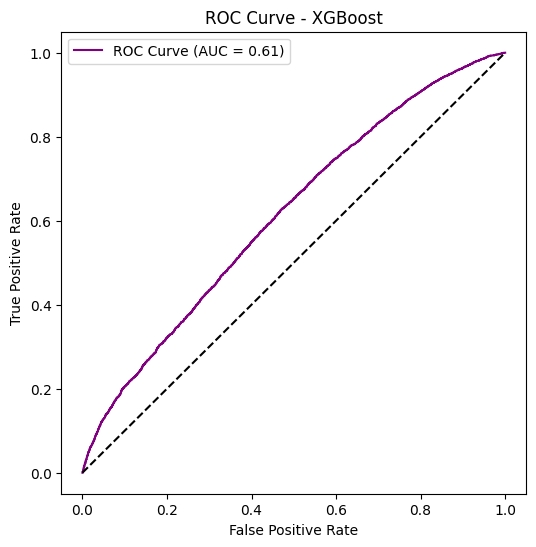

[LightGBM] [Info] Number of positive: 25174, number of negative: 25173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4485
[LightGBM] [Info] Number of data points in the train set: 50347, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500010 -> initscore=0.000040
[LightGBM] [Info] Start training from score 0.000040


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5784539604353698
              precision    recall  f1-score   support

           0       0.59      0.51      0.55      6293
           1       0.57      0.64      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



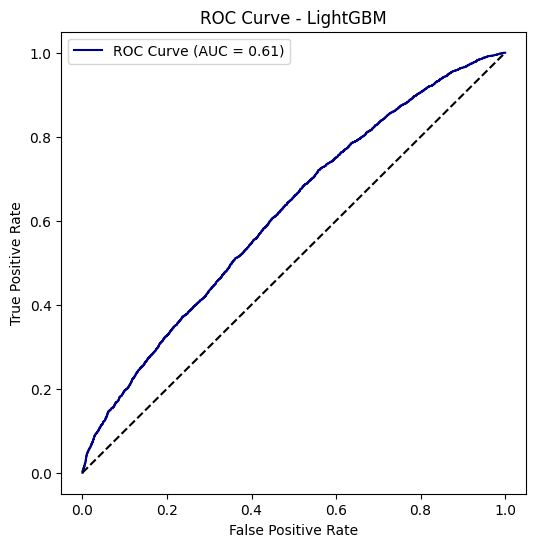

CatBoost Results
Accuracy: 0.5772622547072376
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      6293
           1       0.57      0.65      0.61      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.57     12587
weighted avg       0.58      0.58      0.57     12587



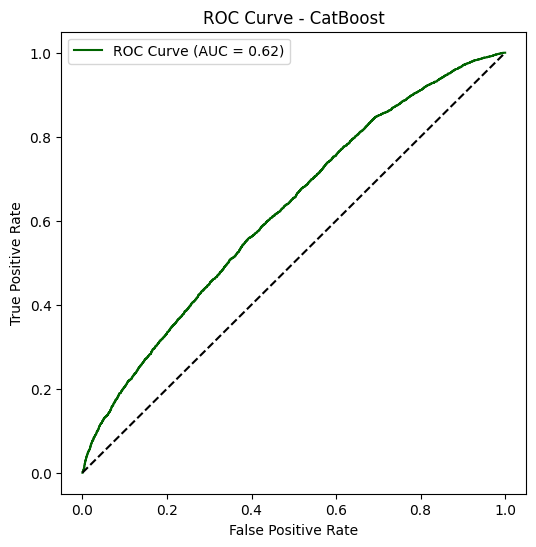

Bagging Decision Tree Results
Accuracy: 0.5696353380471916
              precision    recall  f1-score   support

           0       0.59      0.48      0.53      6293
           1       0.56      0.66      0.61      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.57     12587
weighted avg       0.57      0.57      0.57     12587



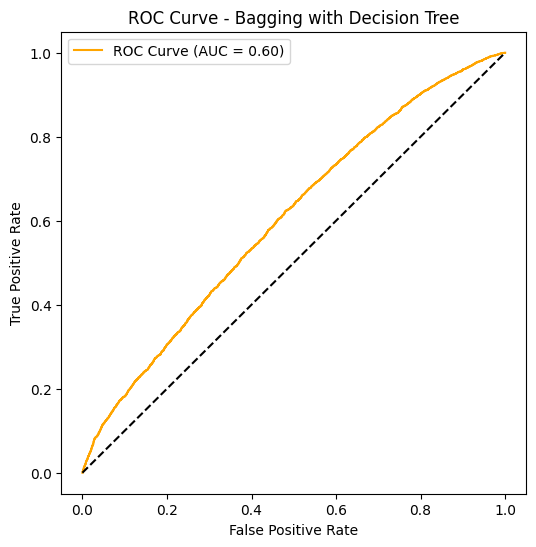

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.577262  0.621302  0.606522
1               LightGBM  0.578454  0.614640  0.604679
2                XGBoost  0.575991  0.613533  0.603874
3      Gradient Boosting  0.565186  0.605682  0.616065
4  Bagging Decision Tree  0.569635  0.602423  0.606351
5          Random Forest  0.564948  0.600984  0.569700
6    Logistic Regression  0.558751  0.582750  0.585461
7          Decision Tree  0.538015  0.552179  0.554440




In [ ]:
#for k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)

Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 5
Yes count: 31468
No count : 31466
Logistic Regression Results
Accuracy: 0.5666163502025899
              precision    recall  f1-score   support

           0       0.58      0.51      0.54      6293
           1       0.56      0.62      0.59      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.57     12587
weighted avg       0.57      0.57      0.57     12587



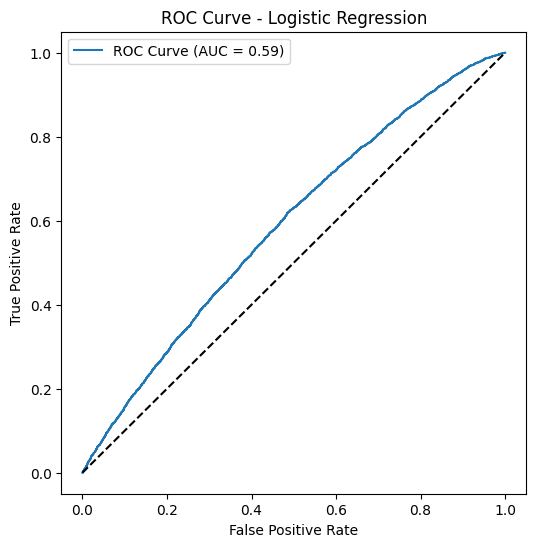

Random Forest Results
Accuracy: 0.5767061253674426
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      6293
           1       0.58      0.57      0.58      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



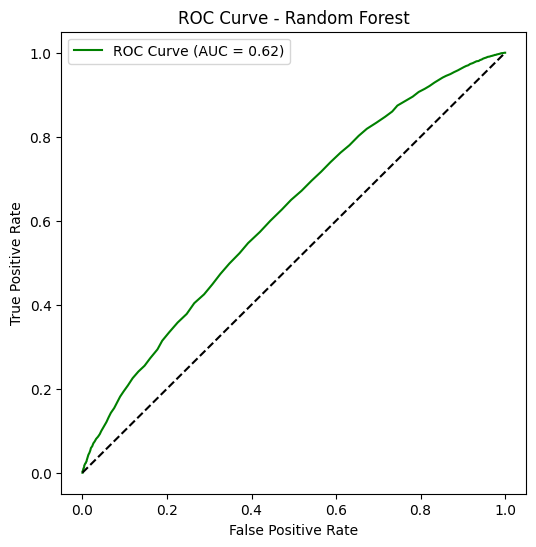

Decision Tree Results
Accuracy: 0.5408755064749344
              precision    recall  f1-score   support

           0       0.54      0.51      0.52      6293
           1       0.54      0.57      0.56      6294

    accuracy                           0.54     12587
   macro avg       0.54      0.54      0.54     12587
weighted avg       0.54      0.54      0.54     12587



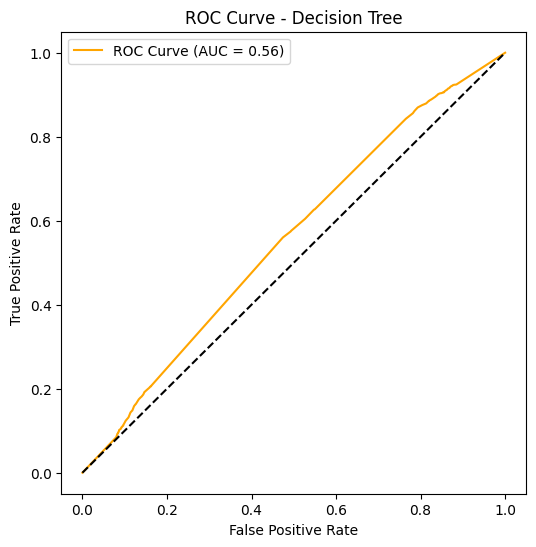

Gradient Boosting Results
Accuracy: 0.5738460316199253
              precision    recall  f1-score   support

           0       0.59      0.46      0.52      6293
           1       0.56      0.68      0.62      6294

    accuracy                           0.57     12587
   macro avg       0.58      0.57      0.57     12587
weighted avg       0.58      0.57      0.57     12587



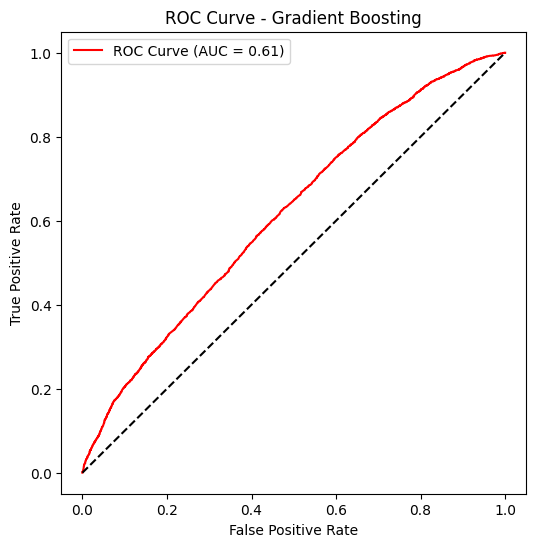

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:34:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5834591244935251
              precision    recall  f1-score   support

           0       0.59      0.54      0.56      6293
           1       0.58      0.63      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



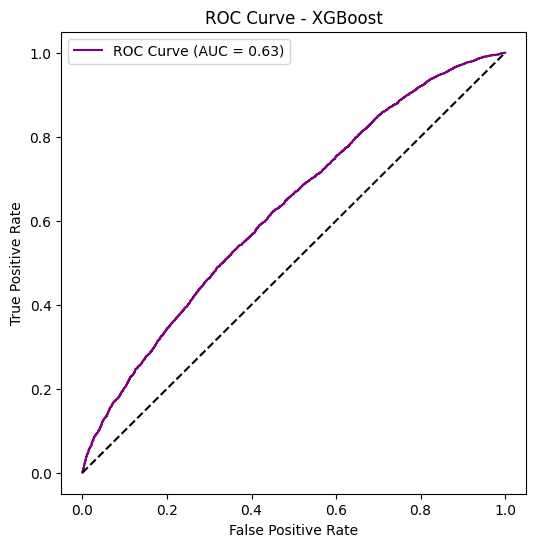

[LightGBM] [Info] Number of positive: 25174, number of negative: 25173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4492
[LightGBM] [Info] Number of data points in the train set: 50347, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500010 -> initscore=0.000040
[LightGBM] [Info] Start training from score 0.000040


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5863986652895845
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      6293
           1       0.58      0.65      0.61      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.58     12587
weighted avg       0.59      0.59      0.58     12587



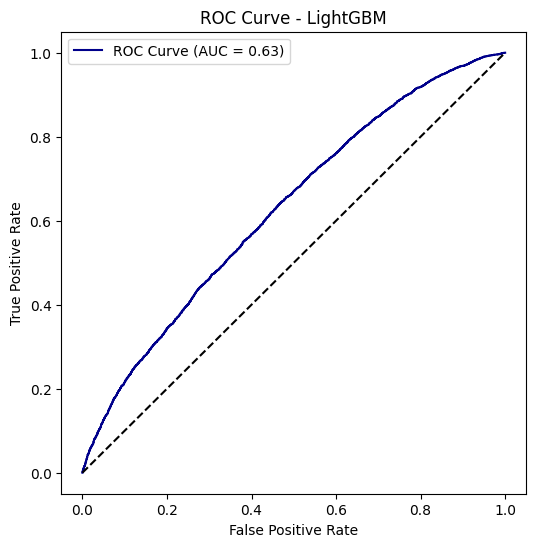

CatBoost Results
Accuracy: 0.5832207833478986
              precision    recall  f1-score   support

           0       0.59      0.52      0.56      6293
           1       0.57      0.65      0.61      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



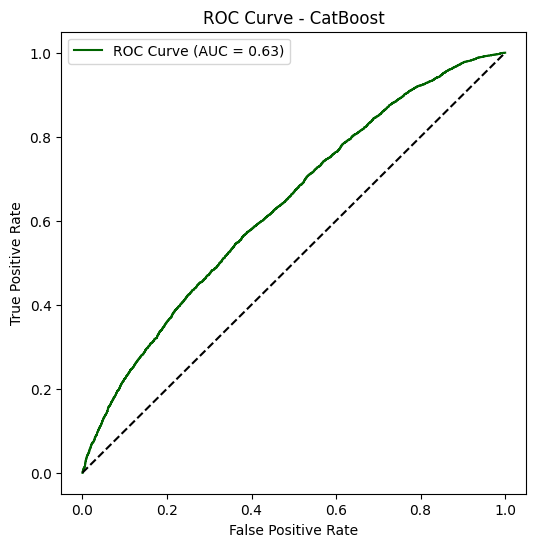

Bagging Decision Tree Results
Accuracy: 0.5740049257170096
              precision    recall  f1-score   support

           0       0.59      0.51      0.54      6293
           1       0.57      0.64      0.60      6294

    accuracy                           0.57     12587
   macro avg       0.58      0.57      0.57     12587
weighted avg       0.58      0.57      0.57     12587



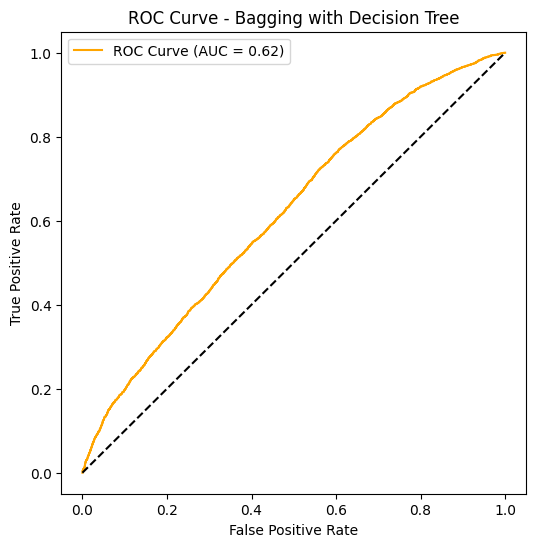

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.583221  0.634121  0.607570
1               LightGBM  0.586399  0.628235  0.612129
2                XGBoost  0.583459  0.626011  0.602291
3  Bagging Decision Tree  0.574005  0.616424  0.601220
4          Random Forest  0.576706  0.615437  0.575255
5      Gradient Boosting  0.573846  0.614209  0.616419
6    Logistic Regression  0.566616  0.588730  0.590373
7          Decision Tree  0.540876  0.555558  0.555906




In [ ]:
#for k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)

Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 7
Yes count: 31468
No count : 31464
Logistic Regression Results
Accuracy: 0.5636768094065305
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      6293
           1       0.56      0.61      0.58      6294

    accuracy                           0.56     12587
   macro avg       0.56      0.56      0.56     12587
weighted avg       0.56      0.56      0.56     12587



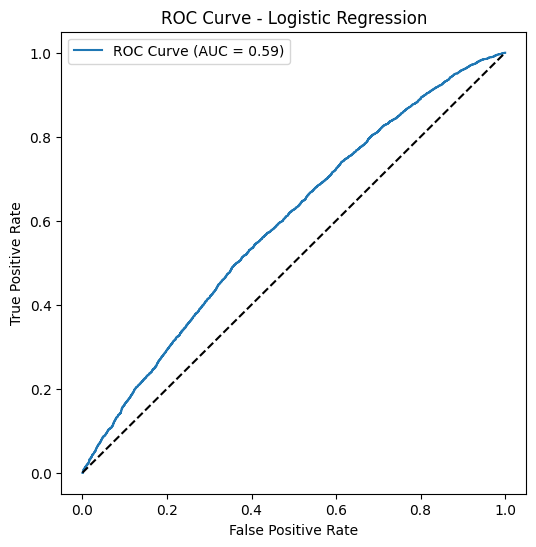

Random Forest Results
Accuracy: 0.5744816080082625
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      6293
           1       0.57      0.58      0.58      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.57     12587
weighted avg       0.57      0.57      0.57     12587



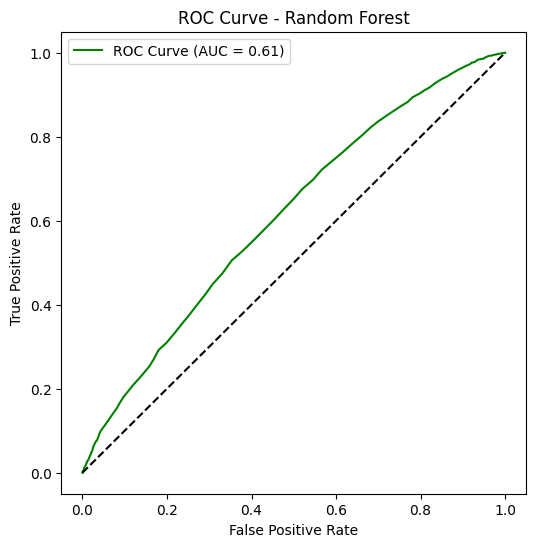

Decision Tree Results
Accuracy: 0.5444506236593311
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      6293
           1       0.53      0.72      0.61      6294

    accuracy                           0.54     12587
   macro avg       0.55      0.54      0.53     12587
weighted avg       0.55      0.54      0.53     12587



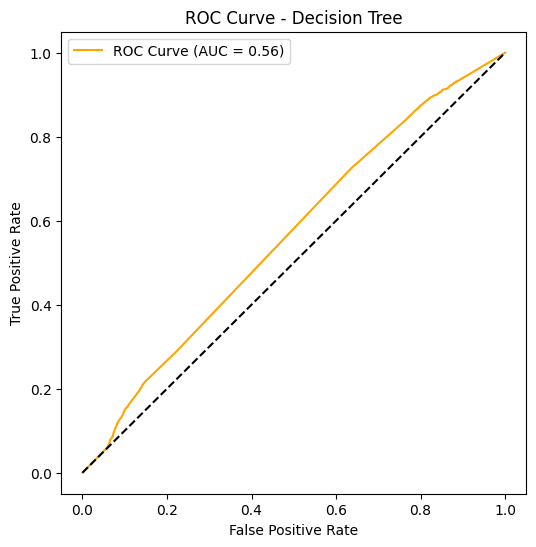

Gradient Boosting Results
Accuracy: 0.570429808532613
              precision    recall  f1-score   support

           0       0.59      0.46      0.52      6293
           1       0.56      0.68      0.61      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.57     12587
weighted avg       0.57      0.57      0.57     12587



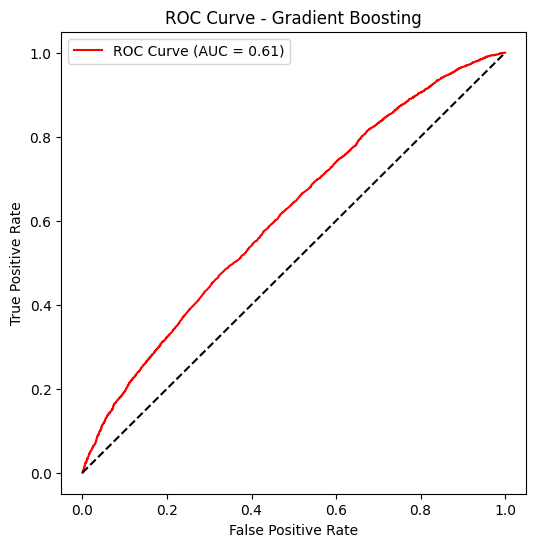

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:47:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.585604194804163
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      6293
           1       0.58      0.62      0.60      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



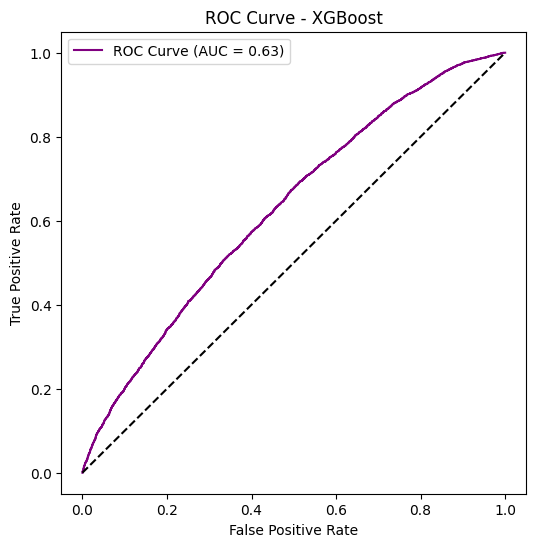

[LightGBM] [Info] Number of positive: 25174, number of negative: 25171
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4493
[LightGBM] [Info] Number of data points in the train set: 50345, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500030 -> initscore=0.000119
[LightGBM] [Info] Start training from score 0.000119


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5809168189401763
              precision    recall  f1-score   support

           0       0.59      0.54      0.56      6293
           1       0.57      0.63      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



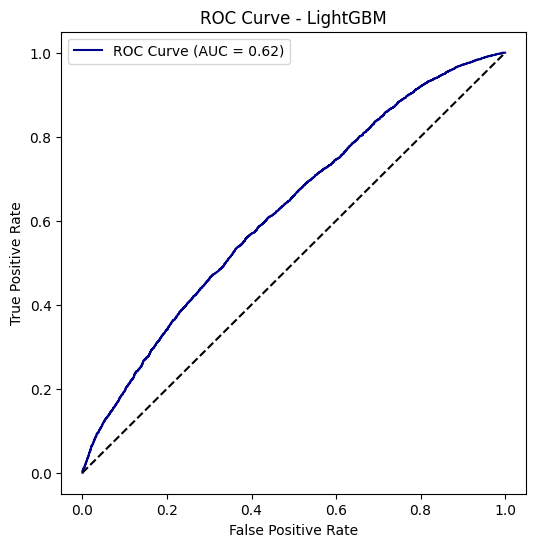

CatBoost Results
Accuracy: 0.5881465003575117
              precision    recall  f1-score   support

           0       0.60      0.53      0.56      6293
           1       0.58      0.65      0.61      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



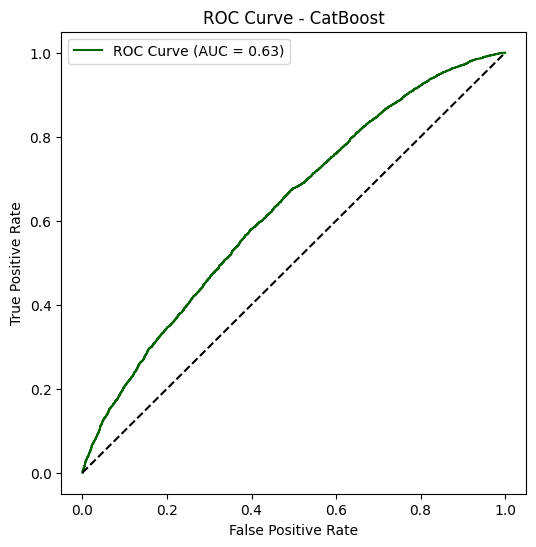

Bagging Decision Tree Results
Accuracy: 0.5732104552315882
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      6293
           1       0.57      0.60      0.59      6294

    accuracy                           0.57     12587
   macro avg       0.57      0.57      0.57     12587
weighted avg       0.57      0.57      0.57     12587



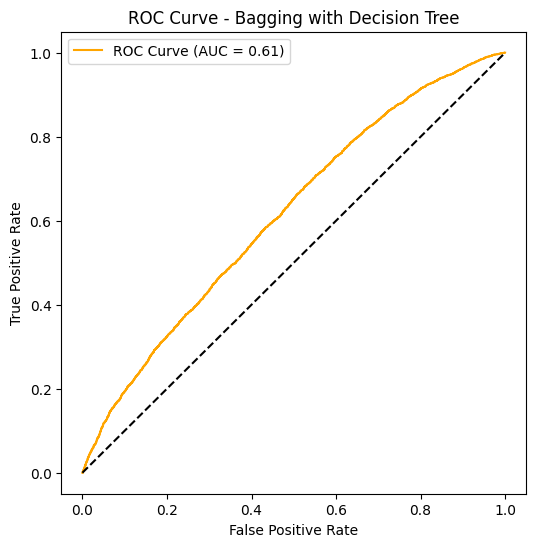

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.588147  0.629466  0.610986
1                XGBoost  0.585604  0.627678  0.600551
2               LightGBM  0.580917  0.622894  0.599255
3  Bagging Decision Tree  0.573210  0.613771  0.585750
4      Gradient Boosting  0.570430  0.611331  0.611706
5          Random Forest  0.574482  0.610734  0.575123
6    Logistic Regression  0.563677  0.592946  0.584632
7          Decision Tree  0.544451  0.562098  0.613612




In [ ]:
#for k=7
k = 7
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)

Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 9
Yes count: 31468
No count : 31463
Logistic Regression Results
Accuracy: 0.5649479621832049
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      6293
           1       0.56      0.62      0.59      6294

    accuracy                           0.56     12587
   macro avg       0.57      0.56      0.56     12587
weighted avg       0.57      0.56      0.56     12587



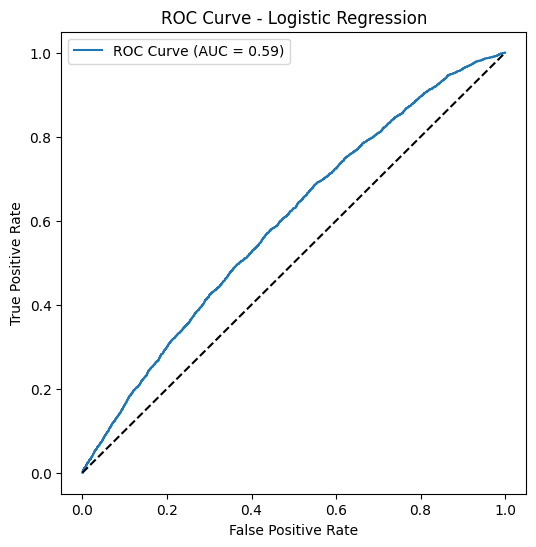

Random Forest Results
Accuracy: 0.5804401366489235
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      6293
           1       0.58      0.58      0.58      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.58     12587
weighted avg       0.58      0.58      0.58     12587



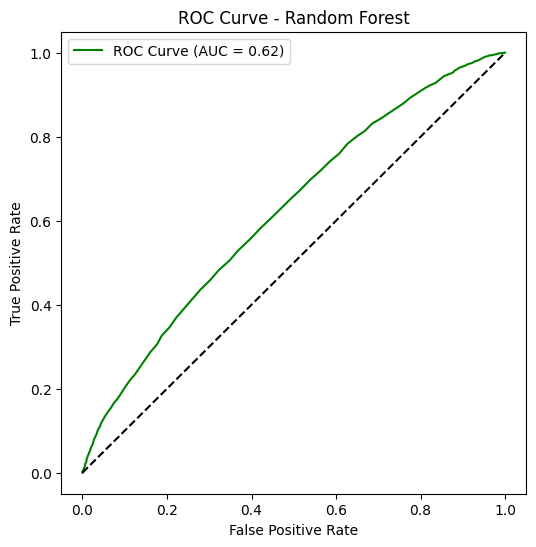

Decision Tree Results
Accuracy: 0.5410344005720188
              precision    recall  f1-score   support

           0       0.55      0.44      0.49      6293
           1       0.53      0.64      0.58      6294

    accuracy                           0.54     12587
   macro avg       0.54      0.54      0.54     12587
weighted avg       0.54      0.54      0.54     12587



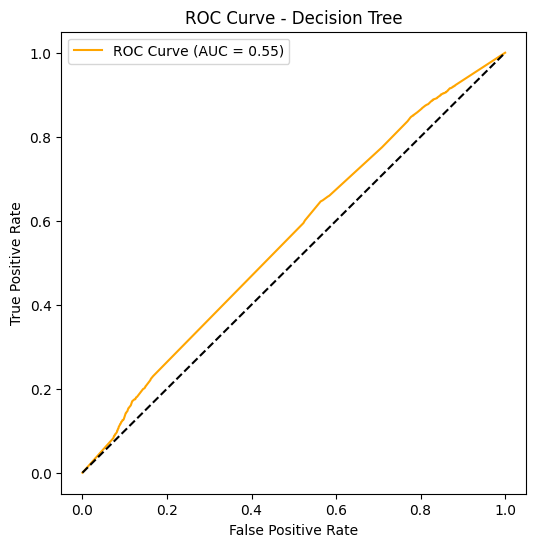

Gradient Boosting Results
Accuracy: 0.5743227139111782
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      6293
           1       0.56      0.69      0.62      6294

    accuracy                           0.57     12587
   macro avg       0.58      0.57      0.57     12587
weighted avg       0.58      0.57      0.57     12587



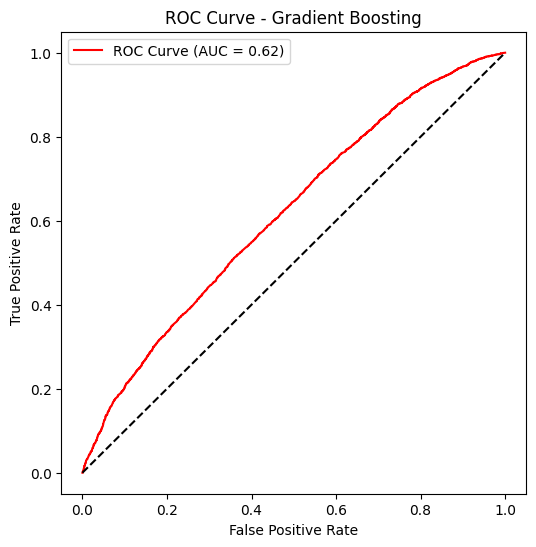

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:51:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5902915706681496
              precision    recall  f1-score   support

           0       0.60      0.55      0.57      6293
           1       0.58      0.63      0.61      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



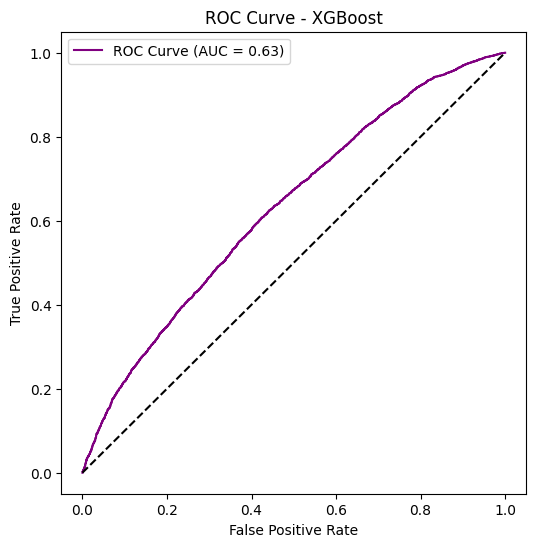

[LightGBM] [Info] Number of positive: 25174, number of negative: 25170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4486
[LightGBM] [Info] Number of data points in the train set: 50344, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500040 -> initscore=0.000159
[LightGBM] [Info] Start training from score 0.000159


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5862397711925001
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      6293
           1       0.58      0.62      0.60      6294

    accuracy                           0.59     12587
   macro avg       0.59      0.59      0.59     12587
weighted avg       0.59      0.59      0.59     12587



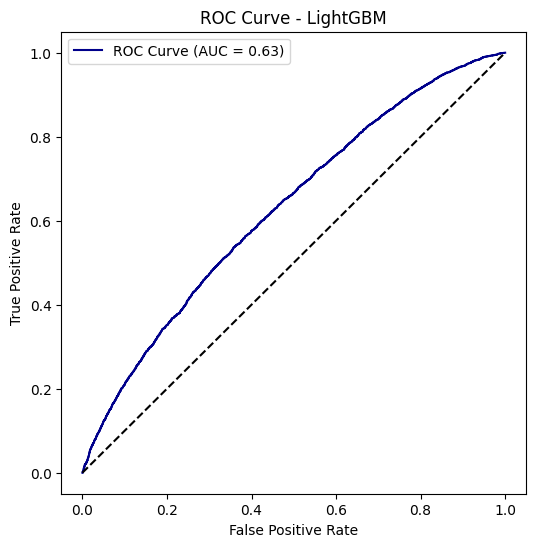

CatBoost Results
Accuracy: 0.594820052435052
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      6293
           1       0.59      0.65      0.62      6294

    accuracy                           0.59     12587
   macro avg       0.60      0.59      0.59     12587
weighted avg       0.60      0.59      0.59     12587



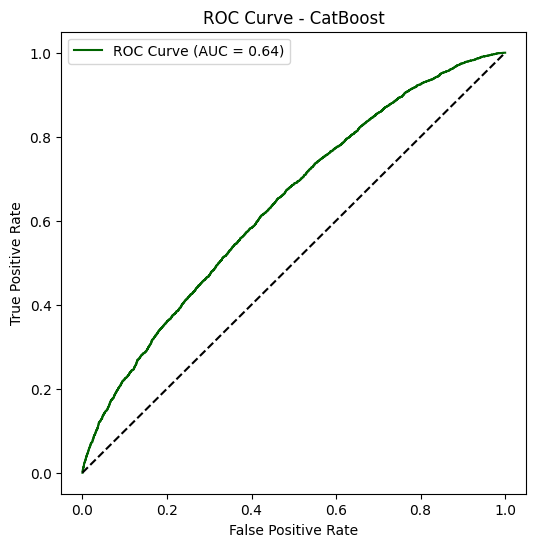

Bagging Decision Tree Results
Accuracy: 0.5751171843965996
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      6293
           1       0.57      0.63      0.60      6294

    accuracy                           0.58     12587
   macro avg       0.58      0.58      0.57     12587
weighted avg       0.58      0.58      0.57     12587



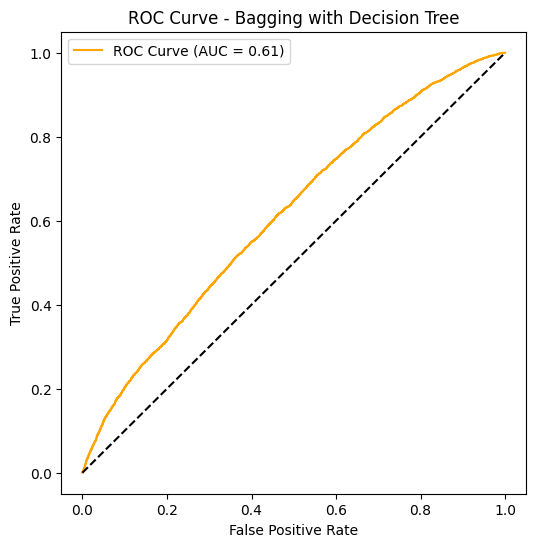

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.594820  0.638371  0.615732
1                XGBoost  0.590292  0.630427  0.607325
2               LightGBM  0.586240  0.628376  0.601530
3          Random Forest  0.580440  0.621483  0.580906
4      Gradient Boosting  0.574323  0.616145  0.618376
5  Bagging Decision Tree  0.575117  0.613413  0.596621
6    Logistic Regression  0.564948  0.594460  0.587464
7          Decision Tree  0.541034  0.554846  0.584239




In [ ]:
#for k=9
k = 9
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)

Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 100
Yes count: 31468
No count : 31416
Logistic Regression Results
Accuracy: 0.560388009859267
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      6283
           1       0.55      0.63      0.59      6294

    accuracy                           0.56     12577
   macro avg       0.56      0.56      0.56     12577
weighted avg       0.56      0.56      0.56     12577



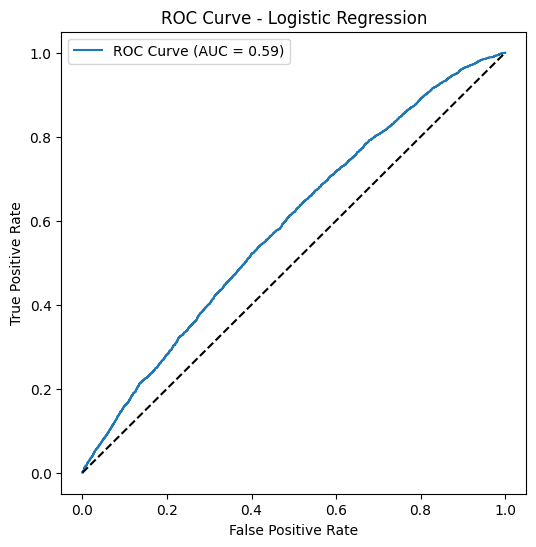

Random Forest Results
Accuracy: 0.5798680130396756
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      6283
           1       0.58      0.58      0.58      6294

    accuracy                           0.58     12577
   macro avg       0.58      0.58      0.58     12577
weighted avg       0.58      0.58      0.58     12577



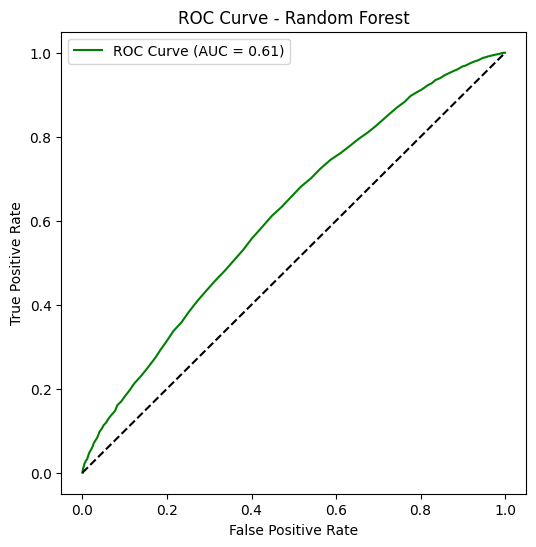

Decision Tree Results
Accuracy: 0.5405104555935437
              precision    recall  f1-score   support

           0       0.55      0.42      0.48      6283
           1       0.53      0.66      0.59      6294

    accuracy                           0.54     12577
   macro avg       0.54      0.54      0.53     12577
weighted avg       0.54      0.54      0.53     12577



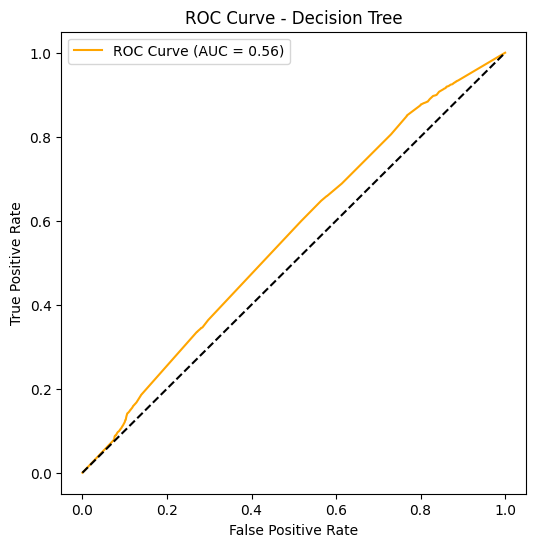

Gradient Boosting Results
Accuracy: 0.5649200922318518
              precision    recall  f1-score   support

           0       0.58      0.47      0.52      6283
           1       0.56      0.66      0.60      6294

    accuracy                           0.56     12577
   macro avg       0.57      0.56      0.56     12577
weighted avg       0.57      0.56      0.56     12577



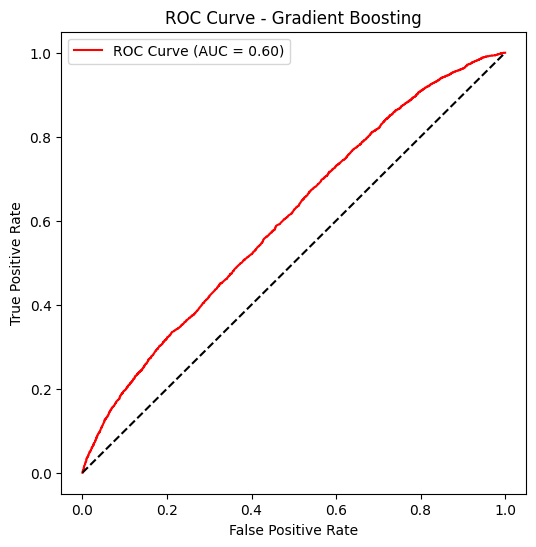

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:14:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5794704619543611
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      6283
           1       0.57      0.64      0.60      6294

    accuracy                           0.58     12577
   macro avg       0.58      0.58      0.58     12577
weighted avg       0.58      0.58      0.58     12577



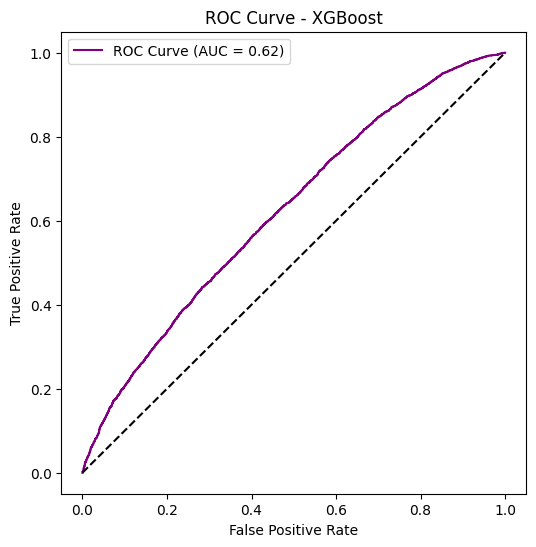

[LightGBM] [Info] Number of positive: 25174, number of negative: 25133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4488
[LightGBM] [Info] Number of data points in the train set: 50307, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500407 -> initscore=0.001630
[LightGBM] [Info] Start training from score 0.001630


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5807426254273674
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      6283
           1       0.57      0.64      0.60      6294

    accuracy                           0.58     12577
   macro avg       0.58      0.58      0.58     12577
weighted avg       0.58      0.58      0.58     12577



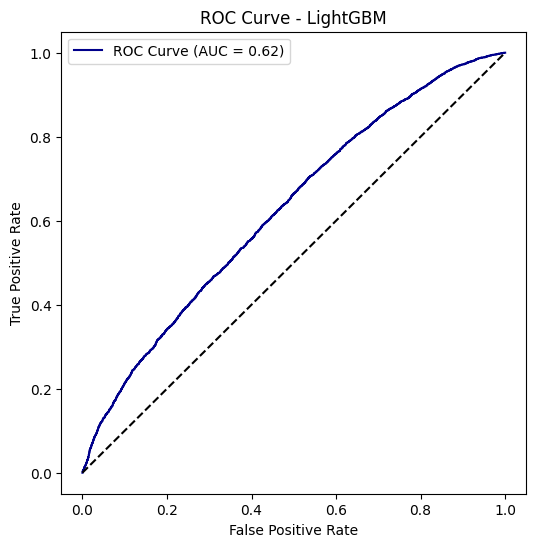

CatBoost Results
Accuracy: 0.5840820545440089
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      6283
           1       0.58      0.65      0.61      6294

    accuracy                           0.58     12577
   macro avg       0.59      0.58      0.58     12577
weighted avg       0.59      0.58      0.58     12577



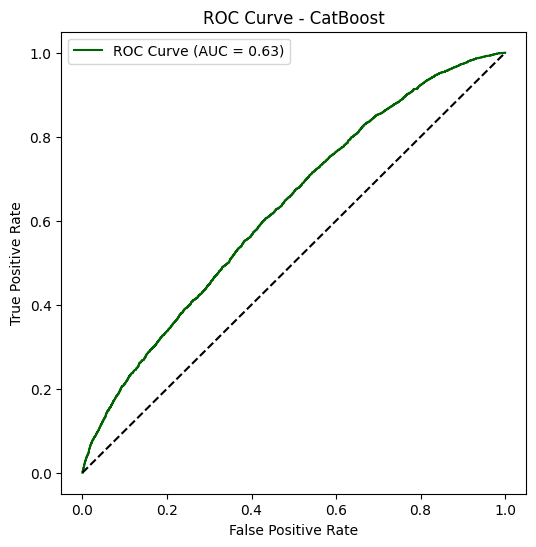

Bagging Decision Tree Results
Accuracy: 0.5711218891627574
              precision    recall  f1-score   support

           0       0.58      0.50      0.54      6283
           1       0.56      0.64      0.60      6294

    accuracy                           0.57     12577
   macro avg       0.57      0.57      0.57     12577
weighted avg       0.57      0.57      0.57     12577



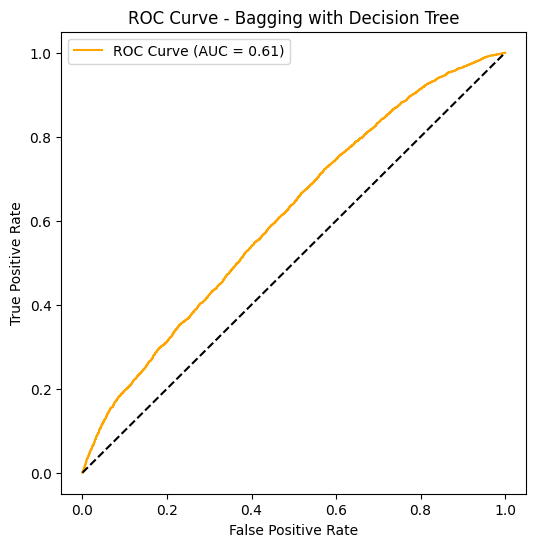

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.584082  0.627516  0.608956
1               LightGBM  0.580743  0.624377  0.604337
2                XGBoost  0.579470  0.622554  0.602480
3          Random Forest  0.579868  0.614193  0.581962
4  Bagging Decision Tree  0.571122  0.609690  0.598422
5      Gradient Boosting  0.564920  0.603188  0.601224
6    Logistic Regression  0.560388  0.586363  0.588095
7          Decision Tree  0.540510  0.557120  0.589239




In [ ]:
#for k=100
k = 100
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)


Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 200
Yes count: 31468
No count : 31366
Logistic Regression Results
Accuracy: 0.5636985756345986
              precision    recall  f1-score   support

           0       0.57      0.50      0.53      6273
           1       0.56      0.63      0.59      6294

    accuracy                           0.56     12567
   macro avg       0.56      0.56      0.56     12567
weighted avg       0.56      0.56      0.56     12567



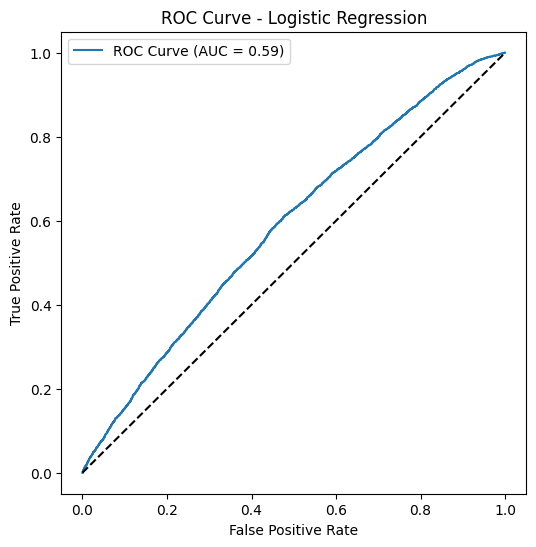

Random Forest Results
Accuracy: 0.5802498607463993
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      6273
           1       0.58      0.59      0.58      6294

    accuracy                           0.58     12567
   macro avg       0.58      0.58      0.58     12567
weighted avg       0.58      0.58      0.58     12567



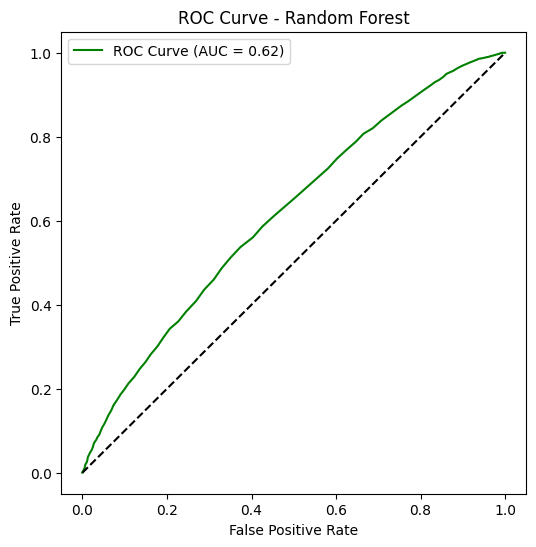

Decision Tree Results
Accuracy: 0.5448396594254794
              precision    recall  f1-score   support

           0       0.56      0.40      0.47      6273
           1       0.54      0.69      0.60      6294

    accuracy                           0.54     12567
   macro avg       0.55      0.54      0.53     12567
weighted avg       0.55      0.54      0.53     12567



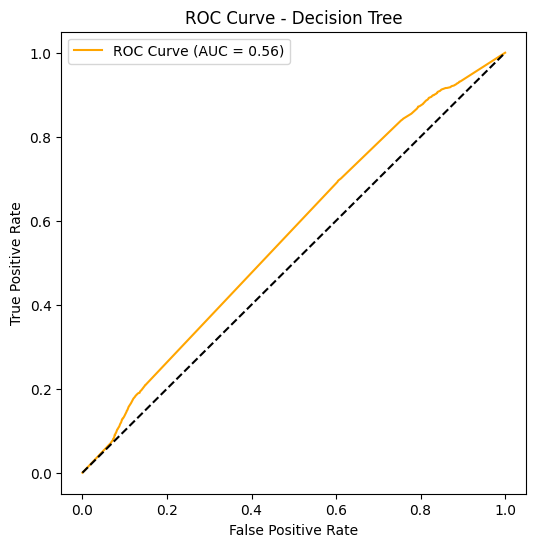

Gradient Boosting Results
Accuracy: 0.5783400970796531
              precision    recall  f1-score   support

           0       0.60      0.45      0.51      6273
           1       0.56      0.71      0.63      6294

    accuracy                           0.58     12567
   macro avg       0.58      0.58      0.57     12567
weighted avg       0.58      0.58      0.57     12567



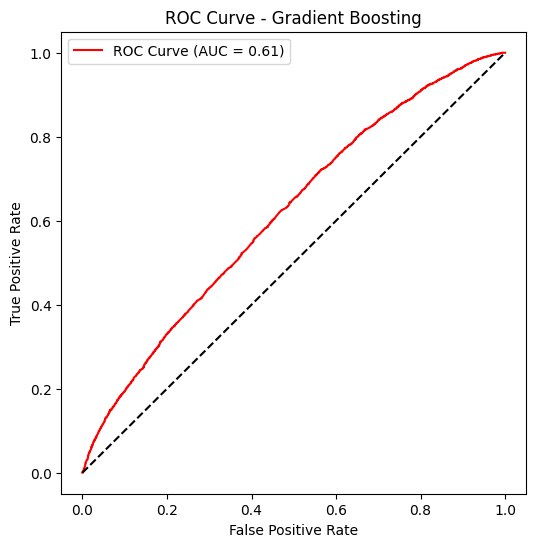

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:20:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5877297684411554
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      6273
           1       0.58      0.65      0.61      6294

    accuracy                           0.59     12567
   macro avg       0.59      0.59      0.59     12567
weighted avg       0.59      0.59      0.59     12567



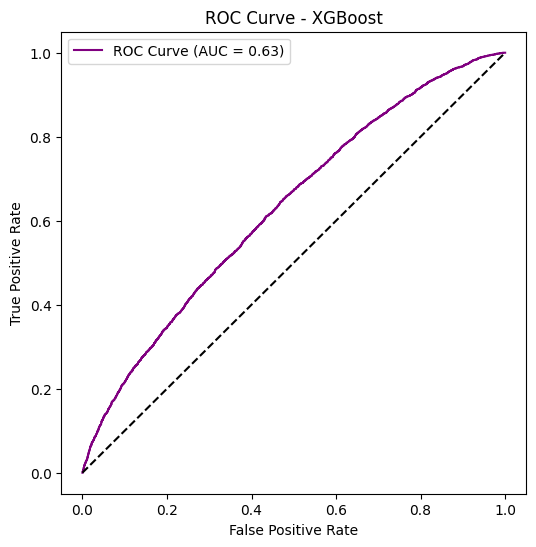

[LightGBM] [Info] Number of positive: 25174, number of negative: 25093
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4477
[LightGBM] [Info] Number of data points in the train set: 50267, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500806 -> initscore=0.003223
[LightGBM] [Info] Start training from score 0.003223


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.5852629903716082
              precision    recall  f1-score   support

           0       0.59      0.53      0.56      6273
           1       0.58      0.64      0.61      6294

    accuracy                           0.59     12567
   macro avg       0.59      0.59      0.58     12567
weighted avg       0.59      0.59      0.58     12567



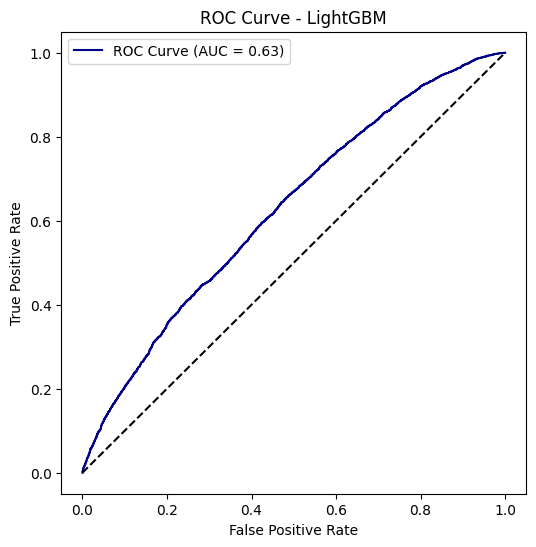

CatBoost Results
Accuracy: 0.5867748866077823
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      6273
           1       0.58      0.66      0.62      6294

    accuracy                           0.59     12567
   macro avg       0.59      0.59      0.58     12567
weighted avg       0.59      0.59      0.58     12567



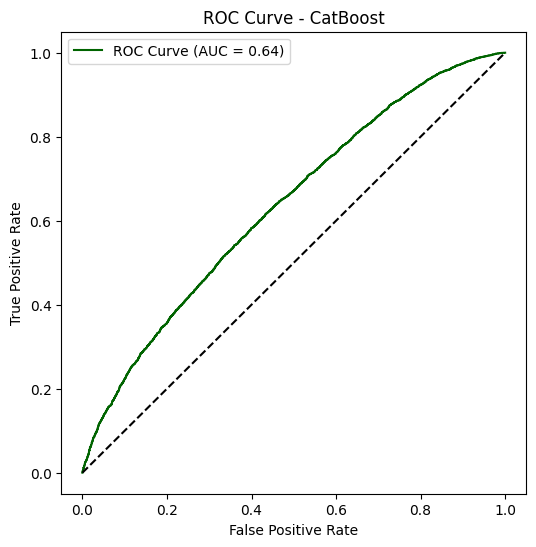

Bagging Decision Tree Results
Accuracy: 0.5761120394684491
              precision    recall  f1-score   support

           0       0.60      0.45      0.51      6273
           1       0.56      0.70      0.62      6294

    accuracy                           0.58     12567
   macro avg       0.58      0.58      0.57     12567
weighted avg       0.58      0.58      0.57     12567



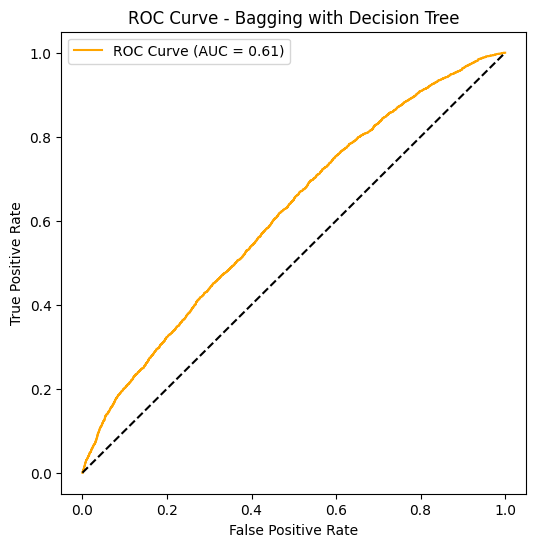

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.586775  0.635159  0.615077
1                XGBoost  0.587730  0.629074  0.612462
2               LightGBM  0.585263  0.626341  0.605749
3          Random Forest  0.580250  0.616505  0.583103
4      Gradient Boosting  0.578340  0.614980  0.627067
5  Bagging Decision Tree  0.576112  0.613048  0.624304
6    Logistic Regression  0.563699  0.587383  0.591461
7          Decision Tree  0.544840  0.561527  0.603878




In [ ]:
#for k = 200
k = 200
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)


Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")

Results for k = 250
Yes count: 31468
No count : 31346
Logistic Regression Results
Accuracy: 0.5609328981931068
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      6269
           1       0.55      0.63      0.59      6294

    accuracy                           0.56     12563
   macro avg       0.56      0.56      0.56     12563
weighted avg       0.56      0.56      0.56     12563



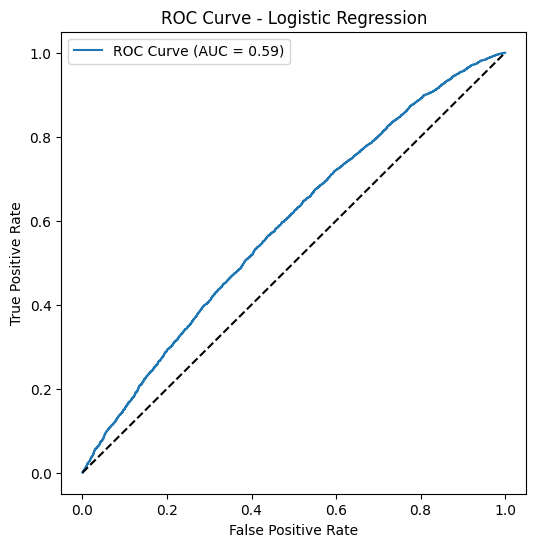

Random Forest Results
Accuracy: 0.5734299132372841
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      6269
           1       0.57      0.58      0.58      6294

    accuracy                           0.57     12563
   macro avg       0.57      0.57      0.57     12563
weighted avg       0.57      0.57      0.57     12563



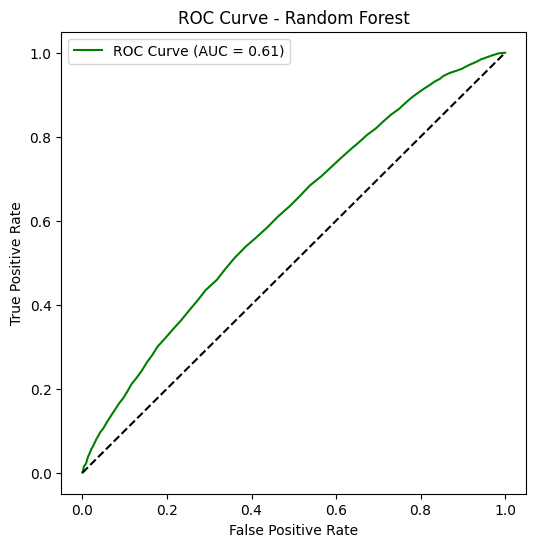

Decision Tree Results
Accuracy: 0.5526546207116134
              precision    recall  f1-score   support

           0       0.59      0.35      0.44      6269
           1       0.54      0.75      0.63      6294

    accuracy                           0.55     12563
   macro avg       0.56      0.55      0.53     12563
weighted avg       0.56      0.55      0.53     12563



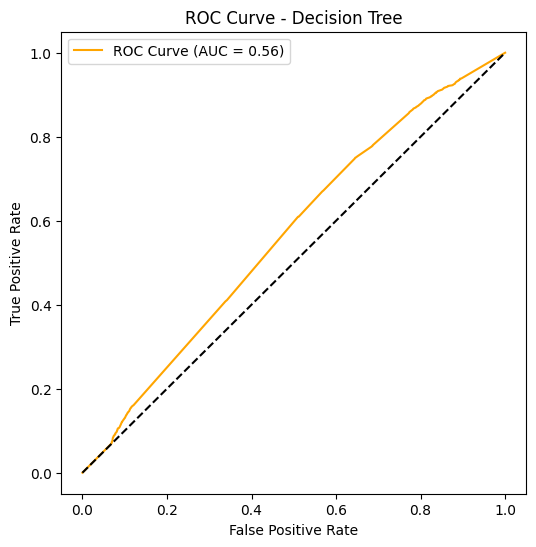

Gradient Boosting Results
Accuracy: 0.5733503144153467
              precision    recall  f1-score   support

           0       0.60      0.43      0.50      6269
           1       0.56      0.71      0.63      6294

    accuracy                           0.57     12563
   macro avg       0.58      0.57      0.56     12563
weighted avg       0.58      0.57      0.56     12563



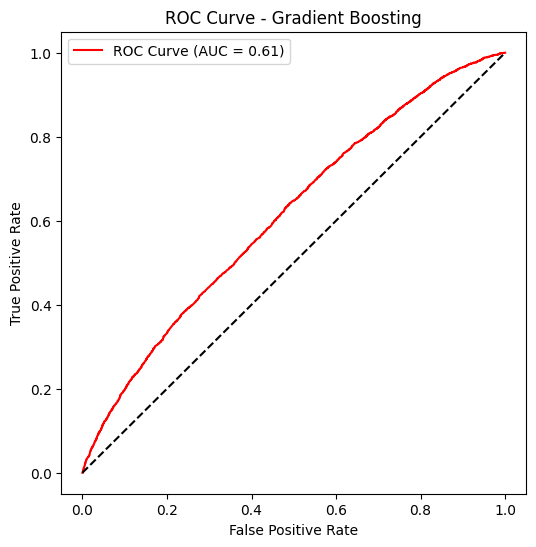

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:27:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.5831409695136512
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      6269
           1       0.57      0.66      0.61      6294

    accuracy                           0.58     12563
   macro avg       0.59      0.58      0.58     12563
weighted avg       0.59      0.58      0.58     12563



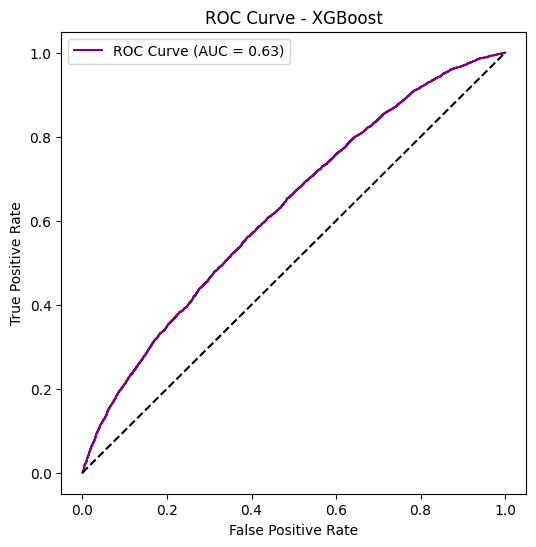

[LightGBM] [Info] Number of positive: 25174, number of negative: 25077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4499
[LightGBM] [Info] Number of data points in the train set: 50251, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500965 -> initscore=0.003861
[LightGBM] [Info] Start training from score 0.003861


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results
Accuracy: 0.584573748308525
              precision    recall  f1-score   support

           0       0.60      0.52      0.55      6269
           1       0.58      0.65      0.61      6294

    accuracy                           0.58     12563
   macro avg       0.59      0.58      0.58     12563
weighted avg       0.59      0.58      0.58     12563



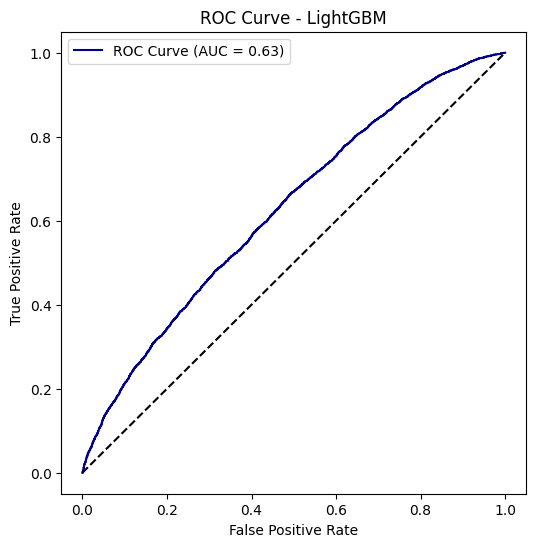

CatBoost Results
Accuracy: 0.5868025153227733
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      6269
           1       0.58      0.67      0.62      6294

    accuracy                           0.59     12563
   macro avg       0.59      0.59      0.58     12563
weighted avg       0.59      0.59      0.58     12563



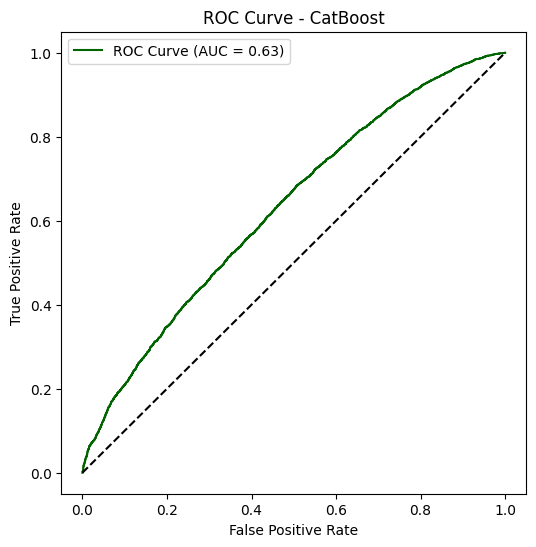

Bagging Decision Tree Results
Accuracy: 0.5740667038127836
              precision    recall  f1-score   support

           0       0.60      0.45      0.51      6269
           1       0.56      0.70      0.62      6294

    accuracy                           0.57     12563
   macro avg       0.58      0.57      0.57     12563
weighted avg       0.58      0.57      0.57     12563



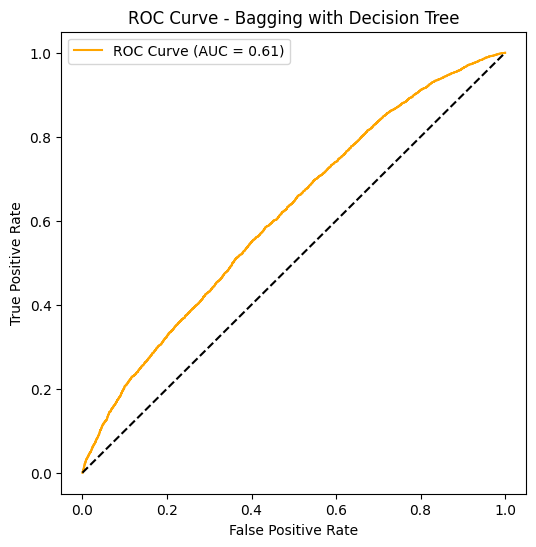

                   Model  Accuracy   ROC-AUC  F1-Score
0               CatBoost  0.586803  0.629286  0.617662
1                XGBoost  0.583141  0.626509  0.613705
2               LightGBM  0.584574  0.626295  0.611595
3  Bagging Decision Tree  0.574067  0.612424  0.621490
4      Gradient Boosting  0.573350  0.612146  0.626741
5          Random Forest  0.573430  0.610780  0.578662
6    Logistic Regression  0.560933  0.587481  0.590071
7          Decision Tree  0.552655  0.563513  0.626876




In [ ]:
#for k=250
k = 250
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X_no)

X_no_clustered = X_no.copy()
X_no_clustered['cluster'] = clusters
n_no_needed = n_yes
cluster_sizes = X_no_clustered['cluster'].value_counts()
cluster_allocation = (cluster_sizes / cluster_sizes.sum() * n_no_needed).astype(int)
selected_no_parts = []
for c in range(k):
    cluster_points = X_no_clustered[X_no_clustered['cluster'] == c].drop(columns="cluster")
    take = min(cluster_allocation[c], len(cluster_points))
    sampled = cluster_points.sample(n=take, random_state=0)
    selected_no_parts.append(sampled)
X_no_balanced = pd.concat(selected_no_parts)
X_balanced = pd.concat([X_yes, X_no_balanced])
y_balanced = pd.Series([1] * len(X_yes) + [0] * len(X_no_balanced), index=X_balanced.index)

print(f"Results for k = {k}")
print("Yes count:", sum(y_balanced == 1))
print("No count :", sum(y_balanced == 0))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_pred_lr, y_proba_lr = LOG_REG(X_train, X_test, y_train, y_test)
y_pred_rf, y_proba_rf = RAN_FOREST(X_train, X_test, y_train, y_test)
y_pred_dt, y_proba_dt = DECI_TREE(X_train,X_test,y_train,y_test)
y_pred_gb, y_proba_gb = GRAD_BOOST(X_train,X_test,y_train,y_test)
y_pred_xgb, y_proba_xgb = XG_BOOST(X_train,X_test,y_train,y_test)
y_pred_lgbm, y_proba_lgbm = LIG_GBM(X_train,X_test,y_train,y_test)
y_pred_catboost, y_proba_catboost = CAT_BOOST(X_train,X_test,y_train,y_test)
y_pred_bagging, y_proba_bagging = BAG_DECI_TREE(X_train,X_test,y_train,y_test)


Results(y_test, y_pred_lr, y_proba_lr, y_pred_dt, y_proba_dt, y_pred_rf, y_proba_rf, y_pred_gb, y_proba_gb, y_pred_xgb, y_proba_xgb, y_pred_lgbm, y_proba_lgbm, y_pred_catboost, y_proba_catboost, y_pred_bagging, y_proba_bagging)
print("\n")